In [85]:
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import geopandas as gpd

import glob

In [86]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\avery\anaconda3\envs\pythonproject\lib\site-packages (0.13.0)



In [87]:
pip install fiona


In [88]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [13]:
# TTC Bus Stop Geographic data
stops = pd.read_csv('stops.txt')
stops=stops.drop_duplicates(['stop_name'])
# stops['coordinates'] = list(zip(stops['stop_lon'], stops['stop_lat']))
# stops['coordinates'] = stops['coordinates'].apply(Point)
# gdf = gpd.GeoDataFrame(stops, geometry = 'coordinates')
gdf = gpd.GeoDataFrame(stops, geometry = gpd.points_from_xy(stops['stop_lon'], stops['stop_lat']))
gdf=gdf.drop(['stop_desc','zone_id', 'stop_url', 'location_type', 'parent_station','stop_timezone', 'wheelchair_boarding'], axis=1)
gdf.crs= {'init': 'epsg:4326'}
gdf_info = gdf.to_crs(epsg=26917)
gdf.head()

c:\Users\avery\anaconda3\envs\pythonProject\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,stop_id,stop_code,stop_name,stop_lat,stop_lon,geometry
0,262,662,Danforth Rd at Kennedy Rd,43.714379,-79.260939,POINT (-79.26094 43.71438)
1,263,929,Davenport Rd at Bedford Rd,43.674448,-79.399659,POINT (-79.39966 43.67445)
2,264,940,Davenport Rd at Dupont St,43.675511,-79.401938,POINT (-79.40194 43.67551)
3,265,1871,Davisville Ave at Cleveland St,43.702088,-79.378112,POINT (-79.37811 43.70209)
4,266,11700,Disco Rd at Attwell Dr,43.701362,-79.594843,POINT (-79.59484 43.70136)


In [117]:
# Importing Gaspares Data
script_directory = os.path.dirname(os.path.abspath('analysis_data_1.csv'))
#path = 'C:\Users\avery\OneDrive\UofT MASc\1st Year\CME538\Big Project\pandaspickledpiperpeanuts\ProcessedData'
# Use glob to find all .csv files in the directory containing 'bus_delay_fuzz'
csv_files = glob.glob(os.path.join(script_directory, '*bus_delays*.csv'))

# Initialize an empty list to store individual DataFrames
dfs = []

# Read and append each DataFrame to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
analysis_data = pd.concat(dfs, ignore_index=True)#.set_index('Route')
#analysis_data['Route'] = analysis_data['Route'].astype(float)
analysis_data.head()

C:\Users\avery\AppData\Local\Temp\ipykernel_21728\2418476004.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


,Unnamed: 0,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,DateTime,analysis
0,0,95.0,Wednesday,York Mills station,Mechanical,10.0,20.0,1734.0,2014-01-01 00:23:00,yorkmillsstation
1,1,102.0,Wednesday,Entire run for route,General Delay,33.0,66.0,8110.0,2014-01-01 00:55:00,entirerunforroute
2,2,54.0,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,7478.0,2014-01-01 01:28:00,lawrenceave&wardenave
3,3,112.0,Wednesday,Kipling Station,Emergency Services,18.0,36.0,8084.0,2014-01-01 01:30:00,kiplingstation
4,4,24.0,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,7843.0,2014-01-01 01:37:00,ellesmererd&victoriaparkave


In [130]:
analysis_data['Route'].unique()
# type(analysis_data['Route'][50])

array([95.0, 102.0, 54.0, 112.0, 24.0, 129.0, 36.0, 53.0, 320.0, 91.0,
       96.0, 12.0, 302.0, 35.0, 32.0, 29.0, 300.0, 809.0, 161.0, 58.0,
       41.0, 37.0, 89.0, 34.0, 43.0, 21.0, 86.0, 7.0, 42.0, 310.0, 38.0,
       30.0, 60.0, 199.0, 5.0, 165.0, 97.0, 116.0, 39.0, 192.0, 59.0,
       125.0, 103.0, 106.0, 25.0, 68.0, 191.0, 6.0, 190.0, 9.0, 85.0,
       26.0, 90.0, 46.0, 52.0, 104.0, 10.0, 113.0, 133.0, 45.0, 70.0,
       131.0, 100.0, 107.0, 47.0, 72.0, 105.0, 55.0, 51.0, 84.0, 63.0,
       132.0, 57.0, 11.0, 16.0, 196.0, 20.0, 69.0, 130.0, 23.0, 75.0,
       122.0, 81.0, 98.0, 17.0, 127.0, 92.0, 15.0, 83.0, 64.0, 108.0,
       66.0, 79.0, 143.0, 71.0, 76.0, 144.0, 110.0, 50.0, 28.0, 87.0,
       80.0, 65.0, 757.0, 907.0, 134.0, 33.0, 61.0, 48.0, 117.0, 94.0,
       756.0, 754.0, 141.0, 135.0, 88.0, 22.0, 307.0, 324.0, 303.0, 309.0,
       67.0, 321.0, 126.0, 56.0, 160.0, 139.0, 44.0, 14.0, 142.0, 111.0,
       40.0, 123.0, 31.0, 78.0, 168.0, 73.0, 109.0, 8.0, 77.0, 701.0,
     

In [ ]:
# Things to replace
# '927 HIGHWAY 27' -> 927
#'600 RAD (LINE 1' -> 1
# '96 WILSON/996 AND 165' -> 96
# 'LINE 2' -> 2
# 'LEASIDE' -> 56
# 'DON MILLS' -> 26

# Remove
#nan
#A242
#898260
#OTC
#9896
#1232

In [114]:
# Counting number of incidents per TTC Stop
route_nums = analysis_data.groupby(['Location'])['Route'].max()
# trial = analysis_data.groupby(['Location']).mean()
# trial = trial.sort_values(['Incident'], ascending=False)

route_nums.head()

TypeError: agg function failed [how->max,dtype->object]

In [58]:
#
merge_big_boy = trial.merge(gdf, how='left', left_on='Location', right_on='stop_name')
merge_big_boy_clean = merge_big_boy.dropna(subset = ['geometry']).drop(['stop_id', 'stop_code','stop_name', 'geometry'], axis=1)
merge_big_boy_clean_gdf = gpd.GeoDataFrame(merge_big_boy_clean, geometry = gpd.points_from_xy(merge_big_boy_clean['stop_lon'], merge_big_boy_clean['stop_lat']))
merge_big_boy_clean_gdf.crs= {'init': 'epsg:4326'}
big_boy_info = merge_big_boy_clean_gdf.to_crs(epsg=26917)
merge_big_boy_clean_gdf.head()

c:\Users\avery\anaconda3\envs\pythonProject\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Location,Incident,stop_lat,stop_lon,geometry
0,Finch Station,6098,43.780942,-79.414829,POINT (-79.41483 43.78094)
3,Warden Station,4156,43.710977,-79.279519,POINT (-79.27952 43.71098)
6,Eglinton Station,3020,43.704314,-79.398308,POINT (-79.39831 43.70431)
8,Kipling Station,2901,43.637209,-79.536117,POINT (-79.53612 43.63721)
11,Wilson Station,2560,43.734475,-79.450920,POINT (-79.45092 43.73448)


In [94]:
# Toronto City Geographic data
city = gpd.read_file('toronto_crs84.geojson')
city_info = city.to_crs(epsg=26917)
city_info['area'] = city_info.geometry.area/1e6
city_info['stops'] = city_info.apply(lambda row: gdf_info.within(row.geometry).sum(), axis=1)
city_info['stop_density'] = city_info['stops'] / city_info['area']
city_info['delays'] = city_info.apply(lambda row: (big_boy_info['Incident']*big_boy_info.within(row.geometry)).sum(), axis=1)
plot_geography = city[['AREA_NAME', 'geometry']].set_index('AREA_NAME')
plot_data = city_info[['AREA_NAME', 'stop_density']]
city.head()

,AREA_S_CD,AREA_NAME,geometry
0,097,Yonge-St.Clair (97),"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
1,027,York University Heights (27),"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
2,038,Lansing-Westgate (38),"POLYGON ((-79.43998 43.76156, -79.44004 43.761..."
3,031,Yorkdale-Glen Park (31),"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."
4,016,Stonegate-Queensway (16),"POLYGON ((-79.49262 43.64744, -79.49277 43.647..."


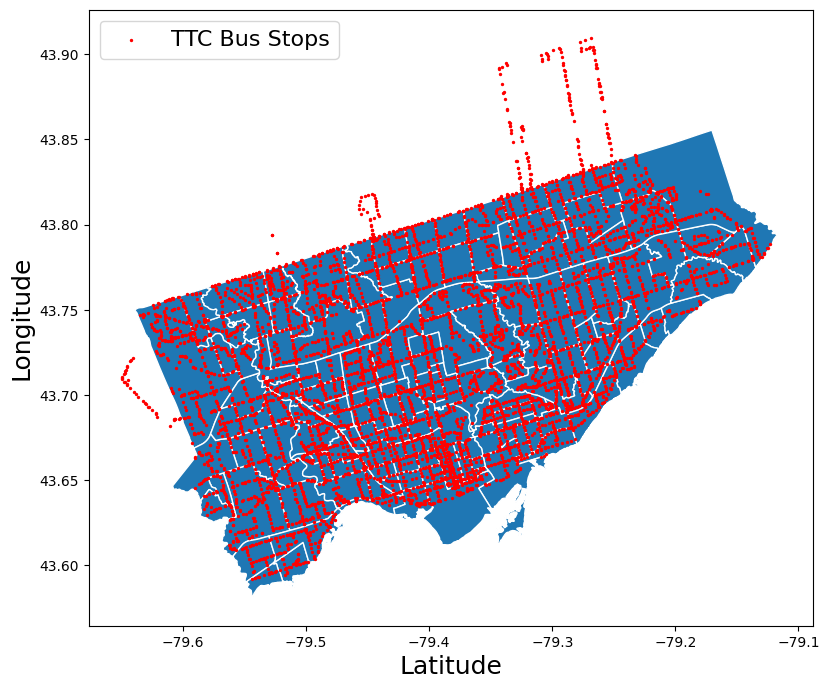

In [56]:
# Basic Plot Ewwwwwwww
ax = city.plot(figsize=(15, 8), edgecolor='w')
gdf.plot(ax=ax, color='red', label='TTC Bus Stops', markersize = 2)
plt.legend(fontsize=16)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18);

In [ ]:
pip install folium


In [93]:
import folium
import folium.plugins

In [92]:
# Choropleth Plot
from folium import Choropleth
toronto_map_live1 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)
Choropleth(geo_data=plot_geography.__geo_interface__, 
           columns=['AREA_NAME', 'stop_density'],
           data=plot_data, 
           key_on='feature.id', 
           fill_color='YlOrRd', 
           legend_name='TTC Bus Stop Density (stations / km**2)'
          ).add_to(toronto_map_live1)
toronto_map_live1

In [ ]:
# Heatmap
from folium import Marker
from folium.plugins import HeatMap
toronto_map_live2 = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=10)
# Add points to the map
HeatMap(data=list(zip(merge_big_boy_clean_gdf.geometry.y,
                      merge_big_boy_clean_gdf.geometry.x)),
        radius=20).add_to(toronto_map_live2)
toronto_map_live2

In [100]:
# PLAYING AROUND WITH ROUTE NAMES ETC
#shapes = pd.read_csv('shapes.txt')
#routes = pd.read_csv('routes.txt')
uoft_data = gpd.read_file('TTC Bus and Streetcar Routes March 2011_polyline.shp').to_crs(epsg=4326)

uoft_data['stops'] = uoft_data.apply(lambda row: big_boy_info.within(row.geometry).sum(), axis=1)
uoft_data.head()

,NUMBER,BRANCH,ALT_BRANCH,ROUTE,DIVISION,OD,ALT_OD,geometry,stops
0,192,NaN,NaN,Airport Rocket,Qsy,Kipling Stn - Pearson Airport,NaN,"MULTILINESTRING ((-79.60701 43.68596, -79.6070...",0
1,117,NaN,NaN,Alness,Wil,Downsview Stn - Steeles via Flint Rd and Alness,NaN,"LINESTRING (-79.46349 43.75030, -79.46443 43.7...",0
2,117,A,NaN,Alness,Wil,Downsview Stn - Steeles via Martin Ross and Al...,NaN,"MULTILINESTRING ((-79.46505 43.75952, -79.4650...",0
3,99,NaN,NaN,Arrow Rd,Arw,Arrow Rd - Jane,NaN,"LINESTRING (-79.52956 43.73624, -79.52983 43.7...",0
4,5,NaN,NaN,Avenue Rd,MtD/Wil,Eglinton Stn - Queen's Park,NaN,"LINESTRING (-79.39847 43.70678, -79.40038 43.7...",0


In [90]:
# shapes['coordinates'] = list(zip(shapes['shape_pt_lon'], shapes['shape_pt_lat']))
# shapes['coordinates'] = shapes['coordinates'].apply(Point)
# shapes_gdf = gpd.GeoDataFrame(shapes, geometry = 'coordinates')

<Axes: >

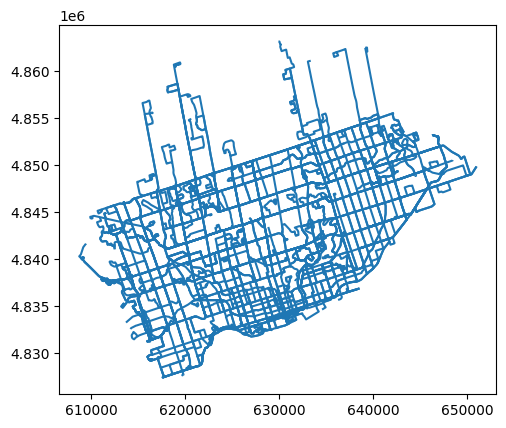

In [91]:
#shapes['shape_id'].nunique()
# routes['route_id'].nunique()
# routes.head()
# shapesgdf = shapes_gdf.head(50000)
# shapesgdf.plot(markersize = 2)
uoft_data.plot()